## Wstęp
Cele:
- Jak zmieniała się spodziewana długość życia i rozkład GDP w poszczególnych krajach na przestrzeni lat?
- Jaka jest zależność pomiędzy GDP a spodziewaną długością życia?
- W którym kraju nastąpiła największa poprawa warunków życia (GDP + LEAB)?

Importowanie bibliotek, ładowanie danych.

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import ttest_1samp

df = pd.read_csv('all_data.csv')

Data exploration

In [81]:
df.head()

,Country,Year,LEAB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [8]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


In [2]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


Renaming column

In [79]:
df = df.rename({"Life expectancy at birth (years)":"LEAB"}, axis = "columns")

Checking GDP and LE distribution.

<Figure size 720x504 with 0 Axes>

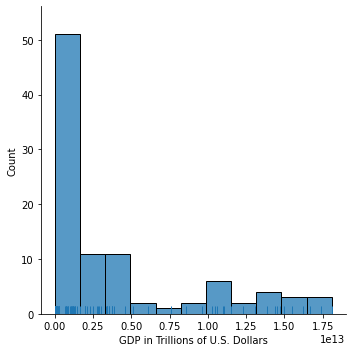

In [10]:
plt.figure(figsize=(10,7))
sns.displot(df.GDP, rug = True, kde=False)
plt.xlabel("GDP in Trillions of U.S. Dollars");

<Figure size 720x504 with 0 Axes>

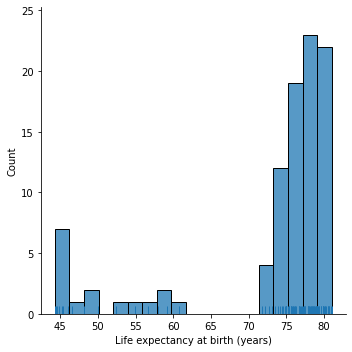

In [12]:
plt.figure(figsize=(10,7))
sns.displot(df.LEAB, rug = True, kde=False)
plt.xlabel("Life expectancy at birth (years)");

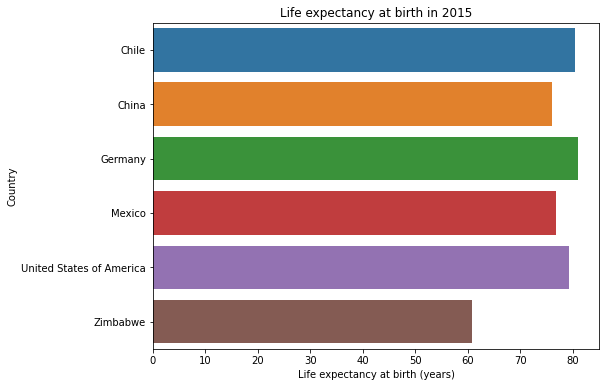

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(x="LEAB", y="Country", data=df[df.Year == 2015])
plt.title('Life expectancy at birth in 2015')
plt.xlabel("Life expectancy at birth (years)");

Test istotności różnicy między średnimi

<AxesSubplot:xlabel='Country', ylabel='LEAB'>

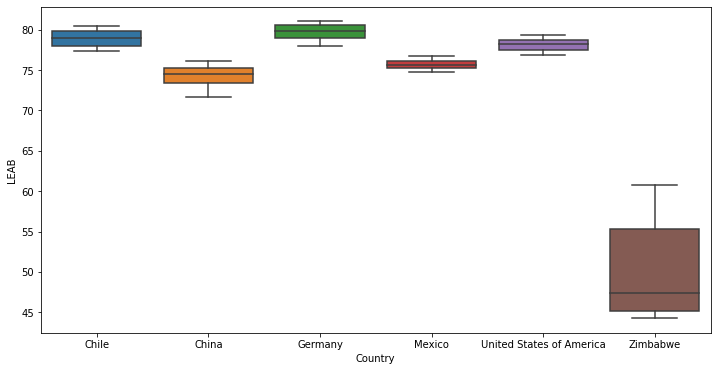

In [80]:
new_df = df[(df.Country == 'Chile') | (df.Country == 'China') | (df.Country == 'Germany') | (df.Country == 'Mexico') | (df.Country == 'United States of America')]
df_lb_mean = np.mean(df.LEAB)
df_zimb = new_df.LEAB[df.Country=='Zimbabwe']

plt.figure(figsize=(12,6))
sns.boxplot(data = df, x = 'Country', y = 'LEAB')

Boxplot exluding Zimbabwe:

<AxesSubplot:xlabel='Country', ylabel='LEAB'>

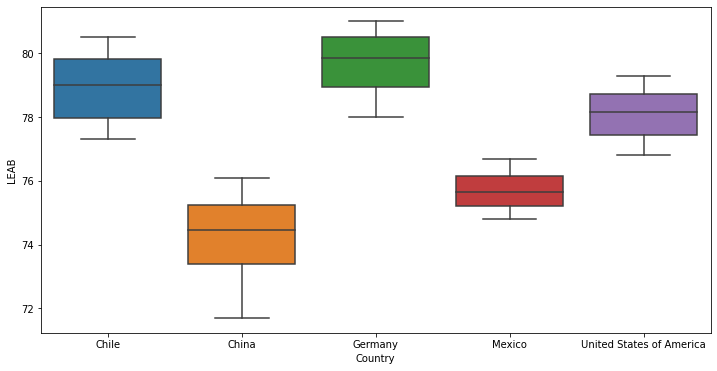

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot(data = new_df, x = 'Country', y = 'LEAB')

Text(0.5, 1.0, 'Life expectancy among different countries')

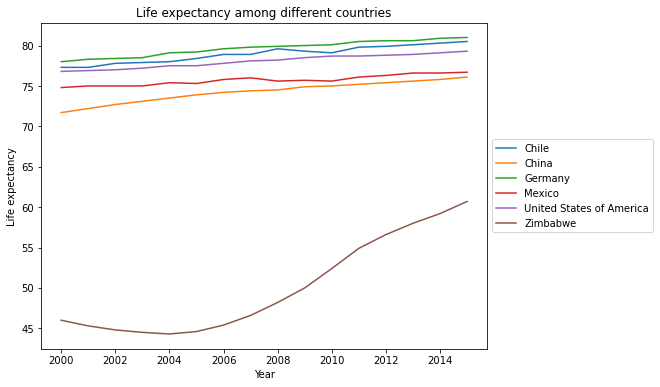

In [22]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.LEAB, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy");
plt.title('Life expectancy among different countries')

Text(0.5, 1.0, 'GDP among different countries')

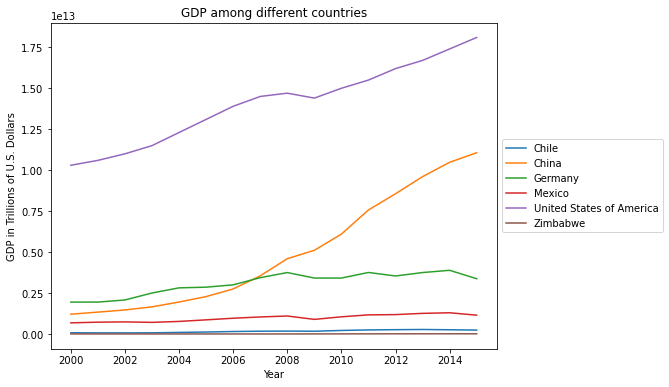

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");
plt.title('GDP among different countries')

GDP changes split by different countries.

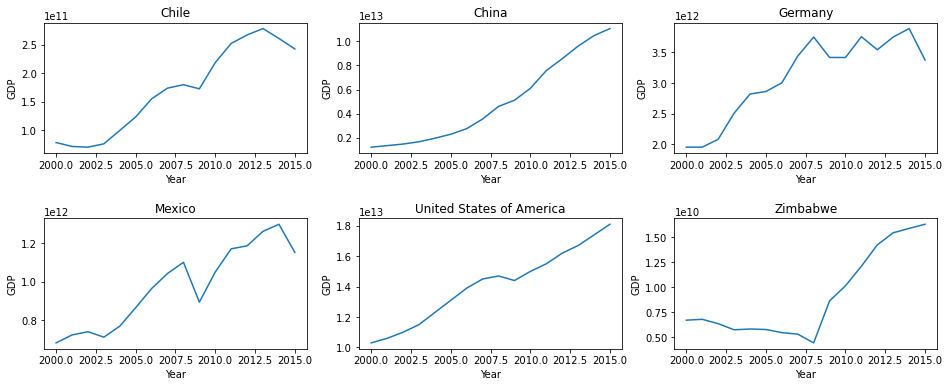

In [60]:
fig, ax = plt.subplots(2, 3, figsize=(16,6))

plt.subplot(2, 3, 1)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Chile'])
plt.title('Chile')

plt.subplot(2, 3, 2)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='China'])
plt.title('China')

plt.subplot(2, 3, 3)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Germany'])
plt.title('Germany')

plt.subplot(2, 3, 4)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Mexico'])
plt.title('Mexico')

plt.subplot(2, 3, 5)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='United States of America'])
plt.title('United States of America')

plt.subplot(2, 3, 6)
sns.lineplot(x=df.Year, y=df.GDP[df.Country=='Zimbabwe'])
plt.title('Zimbabwe')

plt.subplots_adjust(hspace=0.5)

Life expectancy changes across different countries.

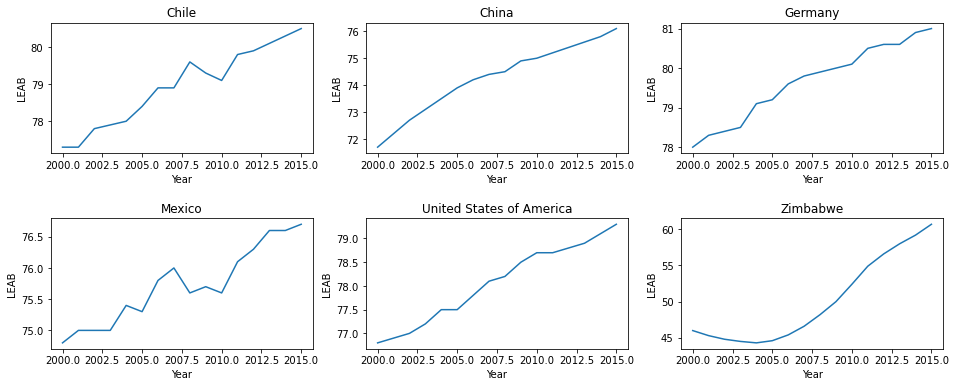

In [3]:
fig, ax = plt.subplots(2, 3, figsize=(16,6))

plt.subplot(2, 3, 1)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Chile'])
plt.title('Chile')

plt.subplot(2, 3, 2)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='China'])
plt.title('China')

plt.subplot(2, 3, 3)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Germany'])
plt.title('Germany')

plt.subplot(2, 3, 4)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Mexico'])
plt.title('Mexico')

plt.subplot(2, 3, 5)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='United States of America'])
plt.title('United States of America')

plt.subplot(2, 3, 6)
sns.lineplot(x=df.Year, y=df.LEAB[df.Country=='Zimbabwe'])
plt.title('Zimbabwe')

plt.subplots_adjust(hspace=0.5)

Which country has the biggest change in life expectancy?

In [73]:
df_min_max_le = df.drop('GDP', axis=1)
le_min = {}
kraje = []
for country in df_min_max_le.Country:
    if country not in le_min:
        le_min[country] = min(df_min_max_le.LEAB[df_min_max_le.Country == country])
        kraje.append(country)
        
le_max = {}
for country in df_min_max_le.Country:
    if country not in le_max:
        le_max[country] = max(df_min_max_le.LEAB[df_min_max_le.Country == country])
        
data_1 = pd.DataFrame([le_min, le_max])
data_1 = data_1.transpose().reset_index()
data_1.columns = (['Country', 'Min LE', 'Max LE'])
data_1.rename( columns={'Unnamed: 0':'new column name'}, inplace=True )
data_1['Diff'] = data_1['Max LE'] - data_1['Min LE']
data_1

,Country,Min LE,Max LE,Diff
0,Chile,77.3,80.5,3.2
1,China,71.7,76.1,4.4
2,Germany,78.0,81.0,3.0
3,Mexico,74.8,76.7,1.9
4,United States of America,76.8,79.3,2.5
5,Zimbabwe,44.3,60.7,16.4


<AxesSubplot:xlabel='Country', ylabel='Diff'>

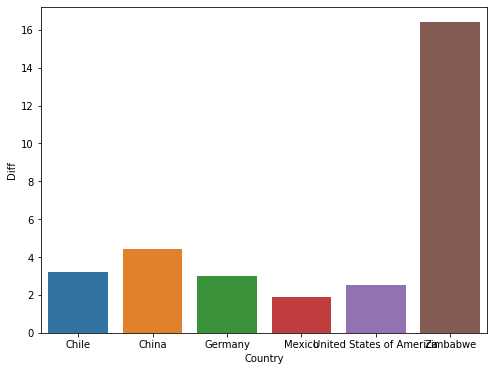

In [76]:
plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="Diff", data=data_1)

Which country had the biggest change in GDP?

In [74]:
df_min_max_gdp = df.drop('LEAB', axis=1)
gdp_min = {}
for country in df_min_max_gdp.Country:
    if country not in gdp_min:
        gdp_min[country] = min(df_min_max_gdp.GDP[df_min_max_gdp.Country == country])
        
gdp_max = {}
for country in df_min_max_gdp.Country:
    if country not in gdp_max:
        gdp_max[country] = max(df_min_max_gdp.GDP[df_min_max_gdp.Country == country])
        
data_2 = pd.DataFrame([gdp_min, gdp_max])
data_2 = data_2.transpose().reset_index()
data_2.columns = (['Country', 'Min GDP', 'Max GDP'])
data_2['Diff'] = data_2['Max GDP'] - data_2['Min GDP']
data_2

,Country,Min GDP,Max GDP,Diff
0,Chile,6.973681e+10,2.783840e+11,2.086472e+11
1,China,1.211350e+12,1.106470e+13,9.853350e+12
2,Germany,1.949950e+12,3.890610e+12,1.940660e+12
3,Mexico,6.836480e+11,1.298460e+12,6.148120e+11
4,United States of America,1.030000e+13,1.810000e+13,7.800000e+12
5,Zimbabwe,4.415703e+09,1.630467e+10,1.188897e+10


<AxesSubplot:xlabel='Country', ylabel='Diff'>

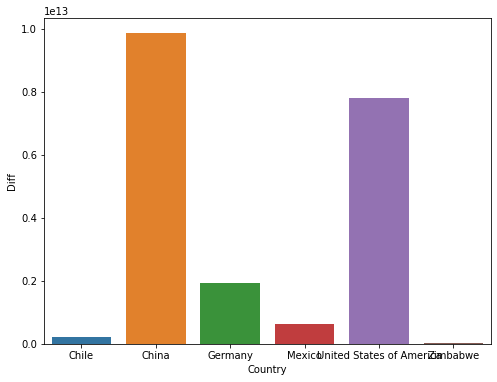

In [75]:
plt.figure(figsize=(8,6))
sns.barplot(x="Country", y="Diff", data=data_2)

GDP and LEAB correlation.

Text(0.5, 1.0, 'GDP and LEAB correlation')

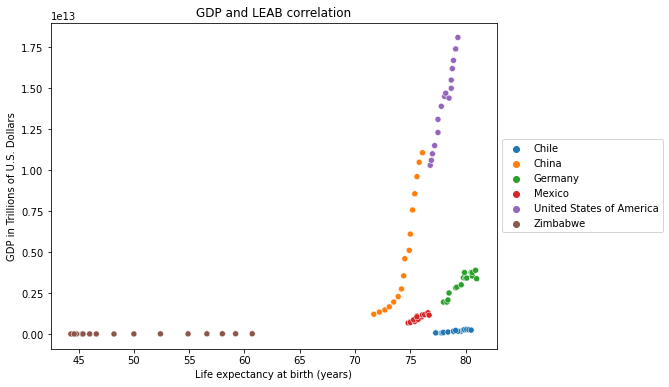

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df.LEAB, y=df.GDP, hue=df.Country).legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel("GDP in Trillions of U.S. Dollars");
plt.title('GDP and LEAB correlation')

## Results
Lorem ipsum